# Model Training

In [17]:
%load_ext autoreload
%autoreload 2

import common
import pandas as pd
import scipy.sparse
import joblib
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Parameters

In [18]:
# change this accordingly
project_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

save_path = f"{project_path}/scicite_preprocessed"
dataset = "selected-features"
project_name = "selected-classifier"

## 1. Load dataset

In [19]:
train_df = pd.read_csv(f"{save_path}/train-{dataset}.csv")
test_df = pd.read_csv(f"{save_path}/test-{dataset}.csv")
label_encoder = joblib.load(f"{save_path}/label_encoder.pkl")

X_train = train_df.drop(columns=['label'])
y_train = train_df["label"]
X_test = test_df.drop(columns=['label'])
y_test = test_df["label"]

smote = SMOTE(sampling_strategy='all', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

## 2. Train Fine-Tuned Random Forest Classifier

In [20]:
model = RandomForestClassifier(n_estimators=1000,class_weight='balanced',criterion='gini',bootstrap=False,max_features='log2',n_jobs=-1, random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       max_features='log2', n_estimators=1000, n_jobs=-1,
                       random_state=42)

## 3. Evaluate model

              precision    recall  f1-score   support

           0    0.83257   0.90772   0.86852       997
           1    0.92279   0.80992   0.86268       605
           2    0.75833   0.71094   0.73387       256

    accuracy                        0.84876      1858
   macro avg    0.83790   0.80953   0.82169      1858
weighted avg    0.85172   0.84876   0.84807      1858



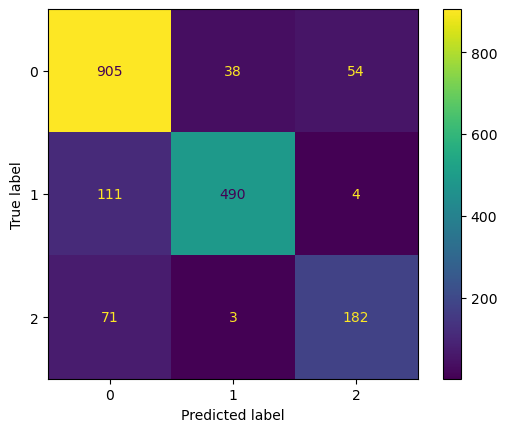

In [21]:
y_pred = model.predict(X_test)

def evaluate(y_true,y_pred,digits=5):
    print(classification_report(y_true,y_pred,digits=digits))
    confusion_mtx = confusion_matrix(y_true,y_pred)
    disp = ConfusionMatrixDisplay(confusion_mtx)
    disp.plot()
    plt.show()

evaluate(y_test, y_pred)

## 4. Save trained model

In [22]:
joblib.dump(model, f"{save_path}/selected_classifier.pkl")

['/home/brina/nus-mcomp/sem3/cs4248-natural-language-processing/Project/CS4248-Project-Team18.git/master/scicite_preprocessed/selected_classifier.pkl']